# Documentation
In this notebook, we provide demo of the entire application. All important files are in demo_files folder. To run the demo, please go to the Main section and run either of following functions:

main1(): this function is supposed to show the utilization of the model and OCR techniques to detect and classify signs on one image. It requires one image, and returns the predictions

main2(): this function is extension of main1, including also traingulation techniques to present the geolocation of the signs. It requires 2 consqutive images. It will return the predictions and geolocation of signs. If there is no enough information about the sign to calcualte it's geolocation, it will display 'No sufficient data for geolocation'


To make the demo run smoothly please access the following google drive: https://drive.google.com/drive/folders/1WGRs61qgIaUiTEI3nxfBzr-rmFaHPufT?usp=drive_link

NOTE: paths, localised in Backedn/imports may need to be adjusted if not using google drive

# *Backend*
Libraries to install and import. Connecting google drive and loading the model and important folders

## Installs

In [ ]:
!pip install art
!pip install sahi
!pip install -U openmim
!pip install -U torch sahi
!pip install -U ultralytics
!pip install tqdm --upgrade
!pip install easyocr
!pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio===0.8.1 -f https://download.pytorch.org/whl/torch_stable.html


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 599.8/599.8 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.8/61.8 MB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 12.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116933 sha256=0ca6aae8f70439c96798f8c2754af53f8aa20043b8066bc960d633e2716c74be
  Stored in directory: /root/.cache/pip/wheels/90/d4/f7/9404e5db0116bd4d43e5666eaa3e70ab53723e1e3ea40c9a95
Successfully built fire
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.8.0.76
    Uninstalling opencv-python-4.8.0.76:
      Successfully uninstalled opencv-python-4.8.0.76
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 kB 971.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 33.3 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.2/645.2 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 1.0 MB/s eta 0:00:00
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.65.2
    Uninstalling tqdm-4.65.2:
      Successfully uninstalled tqdm-4.65.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
openxlab 0.0.28 requires tqdm~=4.65.0, but you have tqdm 4.66.1 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 31.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 76.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 43.9 MB/s eta 0:00:00
Looking in links: https://download.pytorch.org/whl/torch_stable.html
ERROR: Could not find a version that satisfies the requirement torch==1.8.1+cu111 (from versions: 1.11.0, 1.11.0+c

## Imports

In [ ]:
from tqdm.notebook import tqdm
import cv2
import sahi
import ultralytics
import numpy as np
from PIL import Image
import pandas as pd
import torch
import easyocr
import os

from IPython.display import Image as IMG
from matplotlib import pyplot as plt
import random

from sahi.utils.yolov8 import (download_yolov8s_model,)
from sahi import AutoDetectionModel
from sahi.utils.cv import read_image
from sahi.utils.file import download_from_url
from sahi.predict import get_prediction, get_sliced_prediction, predict
from ultralytics import YOLO



from art import *

import pandas as pd
from matplotlib import patches as patches
import math

# Creating reader fir OCR
reader = easyocr.Reader(['en'])

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [66]:
# Import model
model = "/content/drive/MyDrive/Railway/Submittion_docs/demo_files/model/best.pt"
demo_folder = "/content/drive/MyDrive/Railway/Submittion_docs/demo_files/prediction_visualization/"
filename = "prediction_visual.png"

cam_setting = '/content/drive/MyDrive/Railway/Submittion_docs/demo_files/camera_settings/'

positions_url = '/content/drive/MyDrive/Railway/Submittion_docs/demo_files/camera_settings/positions.csv'
images = '/content/drive/MyDrive/Railway/Submittion_docs/demo_files/images/'


# Helpers
Functions needed for the demo

## Main
Main functions to run entire program


main1(): this function is supposed to show the utilization of the model and OCR techniques to detect and classify signs on one image. It requires one image, and returns the predictions

main2(): this function is extension of main1, including also traingulation techniques to present the geolocation of the signs. It requires 2 consqutive images. It will return the predictions and geolocation of signs. If there is no enough information about the sign to calcualte it's geolocation, it will display 'No sufficient data for geolocation'

In [64]:
def main1(image_path, th):


  tprint("IMAGES")

  # Make prediction
  prediction = predict(image_path)

  #Show the initial image and predicted image

  initial_data_image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
  predicted_image = cv2.cvtColor(cv2.imread(demo_folder + filename), cv2.COLOR_BGR2RGB)
  fig, axes = plt.subplots(1, 2, figsize=(20, 10))

  axes[0].imshow(initial_data_image)
  axes[0].set_title('Initial data')
  axes[0].axis('off')
  axes[1].imshow(predicted_image)
  axes[1].set_title('Predicted')
  axes[1].axis('off')
  plt.show()


  tprint("SIGNS")

  i = 1

  for result in prediction:



    # Display only if confidence is bigger than the threshold
    if result['score'] >= th:
      tprint('Sign ' + str(i), font="script")
      i = i + 1
      print_sign(image_path, result['bbox'], result['category_name'], None)




def main2(image_path1, image_path2, th):

  # predictions for image 1
  prediction1 = predict(image_path1)

  # predictions for image 2
  prediction2 = predict(image_path2)

  # map the signs in image 1 and 2 and return geolocations if possible
  mappings = geoloc(image_path1, image_path2, prediction1, prediction2, cam_setting)

  sign = []
  signs1 = {}
  signs2 = {}



  for index, map in enumerate(mappings):
    # Display the sign only if the confidence is bigger than the threshold
    if prediction1[index]['score'] >= th:
      signs1[index] = [prediction1[index]['bbox'], prediction1[index]['category_name'], [map[0], map[1]]]
    if prediction2[index]['score'] >= th:
      signs2[map[2]] = [prediction2[map[2]]['bbox'], prediction2[map[2]]['category_name'], [map[0], map[1]]]


  #
  for i in range(len(prediction1)):
    if i not in signs1.keys() and  prediction1[i]['score'] >= th:
      signs1[str(i)] = [ prediction1[i]['bbox'], prediction1[i]['category_name'], 'No sufficient data for geolocation']


  for i in range(len(prediction2)):
    if i not in signs2.keys() and prediction2[i]['score'] >= th:
      signs2[str(i)] = [prediction2[i]['bbox'], prediction2[i]['category_name'], 'No sufficient data for geolocation']



  tprint("IMAGE 1")

  initial_data_image1 = cv2.cvtColor(cv2.imread(image_path1), cv2.COLOR_BGR2RGB)
  #predicted_image1 = cv2.cvtColor(cv2.imread(demo_folder + demo_filename1), cv2.COLOR_BGR2RGB)
  #fig, axes = plt.subplots(1, 2, figsize=(20, 10))
  plt.imshow(initial_data_image1)
  #axes[1].imshow(predicted_image1)
  #axes[1].set_title('Predicted1')
  #axes[1].axis('off')
  plt.show()

  tprint("Signs 1")


  for sign in signs1.keys():
    print_sign(image_path1, signs1[sign][0], signs1[sign][1], signs1[sign][2])


  tprint("IMAGE 2")


  initial_data_image2 = cv2.cvtColor(cv2.imread(image_path2), cv2.COLOR_BGR2RGB)
  #predicted_image2 = cv2.cvtColor(cv2.imread(demo_folder + demo_filename2), cv2.COLOR_BGR2RGB)
  #fig, axes = plt.subplots(1, 2, figsize=(20, 10))
  plt.imshow(initial_data_image2)

  #axes[1].imshow(predicted_image2)
  #axes[1].set_title('Predicted2')
  #axes[1].axis('off')
  plt.show()

  tprint("Signs 2")


  for sign in signs2.keys():
    print_sign(image_path2, signs2[sign][0], signs2[sign][1], signs2[sign][2])








## Showing the images
Functions for visualization

In [61]:
def crop_sign(bBox0, bBox1, bBox2, bBox3,  image):
 return image[int(bBox1):int(bBox1+bBox3), int(bBox0):int(bBox0+bBox2)]


def print_sign(image_path, bboxs, label, geoloc):


  # cropp the sign from the image
  cropped = crop_sign(bboxs[0], bboxs[1], bboxs[2], bboxs[3], cv2.imread(image_path))


  if label == 'km_signs':
    if recognize_sign_number(cropped) == 'no result':
      return None

  # Display the sign
  plt.imshow(cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB))
  plt.axis("off")
  plt.show()


  # Show the label
  if label == 'stop_indicator':
      print('Label: ' + label + ' ' + recognize_sign_number(cropped))
      if geoloc != None:
        print('Geolocation: ' ,geoloc)

  elif label == 'km_signs':
      print('Label: ' + label)
      if geoloc != None:
        print('Geolocation: ' ,geoloc)


  else:
      print('Label: ' + label)
      if geoloc != None:
        print('Geolocation: ' ,geoloc)



## OCR
Using OCR methods to predict the number on the signs

In [32]:

def recognize_sign_number(image_path):
  # Make the picture bigger
  new_image = cv2.resize(image_path, (800, 800))
  # apply ocr method from easyocr library, allowing only numbers from 0 to 9
  ocr_result = reader.readtext(new_image, allowlist='0123456789')

  if ocr_result == []:
    return 'no result'

  return str(ocr_result[0][1])

## Predict
Using model to make the sign detection and classification

In [60]:
def predict(image_path):

  detection_model = AutoDetectionModel.from_pretrained(
      model_type="yolov8",
      model_path=model,
      confidence_threshold=0.1,
      device= 'cuda:0'
  )

  # get result from the model
  result = get_sliced_prediction(image_path, detection_model)
  # Save the visualization of the prediction
  result.export_visuals(export_dir=demo_folder)

  IMG(demo_folder + filename)
  return result.to_coco_annotations()

## Triangulation

Get location data and cam settings

In [ ]:

def getLocation(file):
  positions = []
  for i in range(len(os.listdir(file))):

      if os.listdir(file)[i].endswith('.csv'):
        positions.append(pd.read_csv(file + '/'+ os.listdir(file)[i]))


  return  pd.concat(positions)

def readSettings(file):
  cam_settings = {}
  for i in range(len(os.listdir(file))):



      if os.listdir(file)[i].endswith('.txt'):

        f = open(os.path.join(file, os.listdir(file)[i]))
        settings = f.readlines()
        foldname = settings[0][19:24]

        folds = {}
        for i in settings:
            if i.startswith('-'):

                split = i[2:-1].split(':')
                folds[split[0].split(' ')[1]] = split[1][1:]


        cam_settings[foldname] = folds

  return cam_settings



In [16]:
positions = pd.read_csv(positions_url)
# print(positions[positions['Filename']=='41728_B004_00885'])
#print(readSettings(cam_setting))

41269
41728
{'41269': {'(EPSG)': '28992+5709', 'width': '7360', 'height': '4912', 'pixelsize': '4.8999999999999995', 'focal': '131.689', 'PPAx': '0.0', 'PPAy': '0.0'}, '41728': {'(EPSG)': '28992+5709', 'width': '14204', 'height': '10652', 'pixelsize': '3.76', 'focal': '108.405', 'PPAx': '0.0', 'PPAy': '0.0'}}


In [34]:
# Returns the rotation matrix
def get_rot_mat(omg, phi, kap):
    # Rotations, note: minus sign!
    omg = -np.deg2rad(omg)
    phi = -np.deg2rad(phi)
    kap = -np.deg2rad(kap)

    Rx = np.array([[1,0,0],[0, np.cos(omg), -np.sin(omg)],[0, np.sin(omg), np.cos(omg)]])
    Ry = np.array([[np.cos(phi), 0, np.sin(phi)],[0,1,0],[-np.sin(phi), 0, np.cos(phi)]])
    Rz = np.array([[np.cos(kap), -np.sin(kap), 0],[np.sin(kap), np.cos(kap), 0], [0,0,1]])
    return Rz@Ry@Rx



# Returns the intrinsic matrix
def get_int_mat(f, img_w, img_h):
    f = (f/10)/100 # focal length in m
    pix_size = 3.76e-6 # Physical size of a pixel on the sensor in m
    fc = f/pix_size # Normalised, dimensionless focal length

    # Image offsets
    u0, v0 = (img_w/2), (img_h/2)

    # Construct intrinsic matrix
    K = np.array([[-fc, 0, u0, 0],[0, fc, v0, 0],[0, 0, 1, 0]])

    return K


# Returns the camera matrix
def get_cam_mat(R, cp, K):
    M = np.eye(4)

    M[0:3,0:3] = R
    M[0:3,3] = -R@cp[:,0]
    return K@M

# Returns the world position based on corresponding pixel pairs and the two camera matrices
def get_pos(pp1, pp2, P1, P2):
    A = np.zeros((4,4))
    A[0,:] = pp1[1]*P1[2,:] - P1[1,:]
    A[1,:] = P1[0,:] - pp1[0]*P1[2,:]
    A[2,:] = pp2[1]*P2[2,:] - P2[1,:]
    A[3,:] = P2[0,:] - pp2[0]*P2[2,:]
    U, S, Vh = np.linalg.svd(A, full_matrices=True)
    pos = Vh[3,:]/Vh[3,3]
    return pos[:-1]



# creates the bounding boxes from the txt files obtained from model
def BoundingBox(dic):

  coorList = []


  for prediction in dic:
    # print(prediction)
    nums = prediction['bbox']
    label = prediction['category_name']

    coordinates = np.zeros((5,2))
    coordinates[0,:] = [(nums[0]+(nums[2]/2)), (nums[1]+(nums[3]/2))]#center
    coordinates[1,:] = [(nums[0]+nums[2]), (nums[2])]#top left corner
    coordinates[2,:] = [(nums[0]+(nums[2])), (nums[2]+(nums[3]))]#top right corner
    coordinates[3,:] = [(nums[0]), (nums[1])]#bottom left corner
    coordinates[4,:] = [(nums[0]), (nums[1]+(nums[3]))]#bottom right corner
    coorList.append([coordinates,label])

  return coorList


# for more info about this algorithm, check https://docs.opencv.org/3.4/d1/de0/tutorial_py_feature_homography.html
def find_matching_points(image1, image2):
    # Load images
    img1 = cv2.imread(image1, cv2.IMREAD_GRAYSCALE)
    img2 = cv2.imread(image2, cv2.IMREAD_GRAYSCALE)

    #Here, you can also used SIFT, but ORB has less computational strain
    orb = cv2.ORB_create()

    # Detect keypoints and descriptors
    kp1, des1 = orb.detectAndCompute(img1, None)
    kp2, des2 = orb.detectAndCompute(img2, None)

    # here, FLANN based matcher can be used to make it faster, however BFmatcher returns the best results
    # Initialize Brute Force Matcher
    bf = cv2.BFMatcher(cv2.NORM_HAMMING)


    matches = bf.knnMatch(des1, des2, k=2)
    # print(matches)

    # Apply ratio test
    good_matches = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            good_matches.append(m)

    # Get matching points that scored high on ratio test
    pts1 = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1,2)
    pts2 = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1,2)

    # Find homography using RANSAC
    H, _ = cv2.findHomography(pts1, pts2, cv2.RANSAC)

    return H


# matches the centers of the bounding boxes of detected objects for triangulation
def find_matching_boxes(predictions1, predictions2,H):
    predictions1 = BoundingBox(predictions1)
    predictions2 = BoundingBox(predictions2)


    distances = np.zeros((len(predictions1), len(predictions2)))


    for i in range(len(predictions1)):
        for j in range(len(predictions2)):
          if predictions1[i][1] == predictions2[j][1]:

            distances[i, j] = math.dist(predictions2[j][0][0],cv2.perspectiveTransform(predictions1[i][0][0].reshape(-1,1,2),H).reshape(2,))
    # print(distances)
    matches = []
    try:
        for i in range(len(predictions1)):
          sorted = np.argsort(distances[i])
          match_index = None
          if (distances[i][sorted[0]]) == 0 and (len(sorted) == 1):
            continue
          elif (distances[i][sorted[0]]) == 0 and (len(sorted) != 1):
            match_index = sorted[1]
          elif distances[i][sorted[0]]!= 0:
            match_index = sorted[0]
          matches.append((i, match_index, predictions1[i][0][0], predictions2[i][0][0], distances[i][match_index]))


        for i1, m1 in enumerate(matches):
          for i2, m2 in enumerate(matches):
            if (m1[1] == m2[1]) and (i2 != i1):
              if m1[4] < m2[4]:
                matches.remove(i1)
              elif m2[4] < m1[4]:
                matches.remove(i2)
    except:
      pass


    return matches

# gets real world position after finding the pairs
def get_pos_matching_boxes(boxpair, im1, im2, positions, camSet):
  P = dict()

  i1 = positions[positions['Filename'] == im1[-20:-4]].index[0]
  i2=  positions[positions['Filename']== im2[-20:-4]].index[0]

  #print(camSet)
  #print(im1)
  #print(im1[-20:-4])
  #print(im1[-20:-15])

  positions.loc[i1]['Omega']



  #getting the relevant info for constructing the camera matrices
  R= get_rot_mat(positions.loc[i1]['Omega'],positions.loc[i1]['Phi'],positions.loc[i1]['Kappa'])
  cp = np.array([[positions.loc[i1]['X/Long'],positions.loc[i1]['Y/Lat'], positions.loc[i1]['Z']]]).T
  K =  get_int_mat(int(float(camSet.get(im1[-20:-15]).get('focal'))),int(float(camSet.get(im1[-20:-15]).get('width'))),int(float(camSet.get(im1[-20:-15]).get('height'))))
  P[im1] = get_cam_mat(R,cp,K)

  R= get_rot_mat(positions.loc[i2]['Omega'],positions.loc[i2]['Phi'],positions.loc[i2]['Kappa'])
  cp = np.array([[positions.loc[i2]['X/Long'],positions.loc[i2]['Y/Lat'], positions.loc[i2]['Z']]]).T
  K =  get_int_mat(int(float(camSet.get(im2[-20:-15]).get('focal'))),int(float(camSet.get(im2[-20:-15]).get('width'))),int(float(camSet.get(im2[-20:-15]).get('height'))))
  P[im2] = get_cam_mat(R,cp,K)



  npoints = len(boxpair)
  wkast = np.zeros((npoints,3))
  final = []

  for i in range(npoints):
      wkast[i,:] = get_pos(boxpair[i][2], boxpair[i][2], P[im1], P[im2])
      #add RD coordinates and index of which box it matches in image2
      final.append([wkast[i,0], wkast[i,1], boxpair[i][1]])
      # print(get_pos(boxpair[i][2], boxpair[i][2], P[im1], P[im2])) #uncomment to see the coordinates printed out

  return final


def geoloc (image1, image2, prediction1, prediction2, path):
    # positions, camSet = OpenImages(path)# path to be changed
    # print(os.path.join(path, 'positions.csv'))
    positions = pd.read_csv(positions_url)

    camSet = readSettings(path)


    H = find_matching_points(image1, image2)
    boxpair = find_matching_boxes(prediction1, prediction2,H)
    results = get_pos_matching_boxes(boxpair, image1, image2,positions,camSet)

    return results



# Main


Performing prediction on 18 number of slices.
Performing prediction on 18 number of slices.
41269
41728
{'41269': {'(EPSG)': '28992+5709', 'width': '7360', 'height': '4912', 'pixelsize': '4.8999999999999995', 'focal': '131.689', 'PPAx': '0.0', 'PPAy': '0.0'}, '41728': {'(EPSG)': '28992+5709', 'width': '14204', 'height': '10652', 'pixelsize': '3.76', 'focal': '108.405', 'PPAx': '0.0', 'PPAy': '0.0'}}
/content/drive/MyDrive/Railway/Submittion_docs/demo_files/images/new_cropped_41269_B004_00850.tif
41269_B004_00850
41269
 ___  __  __     _      ____  _____   _ 
|_ _||  \/  |   / \    / ___|| ____| / |
 | | | |\/| |  / _ \  | |  _ |  _|   | |
 | | | |  | | / ___ \ | |_| || |___  | |
|___||_|  |_|/_/   \_\ \____||_____| |_|
                                        



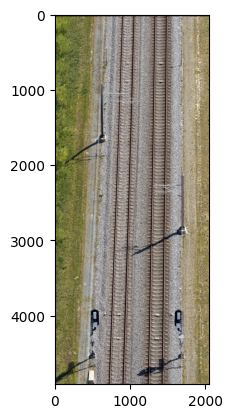

 ____   _                      _ 
/ ___| (_)  __ _  _ __   ___  / |
\___ \ | | / _` || '_ \ / __| | |
 ___) || || (_| || | | |\__ \ | |
|____/ |_| \__, ||_| |_||___/ |_|
           |___/                 



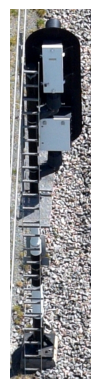

Label: traffic_light
Geolocation:  [191338.4351759306, 504460.81746698305]


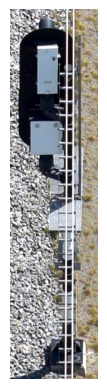

Label: traffic_light
Geolocation:  [191482.66380060493, 504096.51448991697]
 ___  __  __     _      ____  _____   ____  
|_ _||  \/  |   / \    / ___|| ____| |___ \ 
 | | | |\/| |  / _ \  | |  _ |  _|     __) |
 | | | |  | | / ___ \ | |_| || |___   / __/ 
|___||_|  |_|/_/   \_\ \____||_____| |_____|
                                            



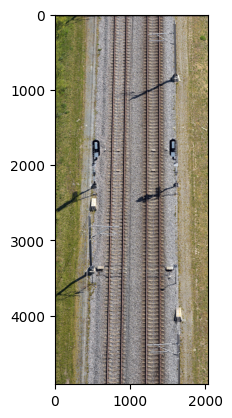

 ____   _                      ____  
/ ___| (_)  __ _  _ __   ___  |___ \ 
\___ \ | | / _` || '_ \ / __|   __) |
 ___) || || (_| || | | |\__ \  / __/ 
|____/ |_| \__, ||_| |_||___/ |_____|
           |___/                     



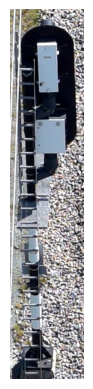

Label: traffic_light
Geolocation:  [191338.4351759306, 504460.81746698305]


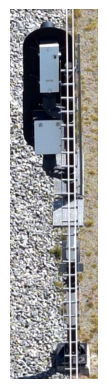

Label: traffic_light
Geolocation:  [191482.66380060493, 504096.51448991697]


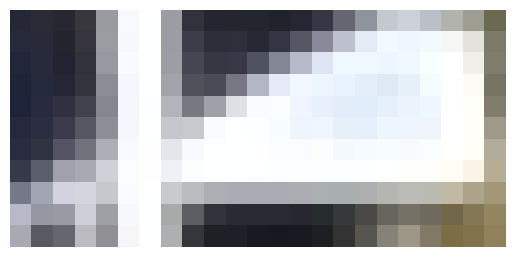

Label: emergency_exit
Geolocation:  No sufficient data for geolocation
Performing prediction on 78 number of slices.
Performing prediction on 78 number of slices.
41269
41728
{'41269': {'(EPSG)': '28992+5709', 'width': '7360', 'height': '4912', 'pixelsize': '4.8999999999999995', 'focal': '131.689', 'PPAx': '0.0', 'PPAy': '0.0'}, '41728': {'(EPSG)': '28992+5709', 'width': '14204', 'height': '10652', 'pixelsize': '3.76', 'focal': '108.405', 'PPAx': '0.0', 'PPAy': '0.0'}}
/content/drive/MyDrive/Railway/Submittion_docs/demo_files/images/new_cropped_41269_B004_00905.tif
41269_B004_00905
41269
 ___  __  __     _      ____  _____   _ 
|_ _||  \/  |   / \    / ___|| ____| / |
 | | | |\/| |  / _ \  | |  _ |  _|   | |
 | | | |  | | / ___ \ | |_| || |___  | |
|___||_|  |_|/_/   \_\ \____||_____| |_|
                                        



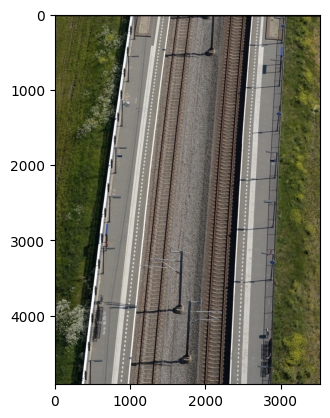

 ____   _                      _ 
/ ___| (_)  __ _  _ __   ___  / |
\___ \ | | / _` || '_ \ / __| | |
 ___) || || (_| || | | |\__ \ | |
|____/ |_| \__, ||_| |_||___/ |_|
           |___/                 



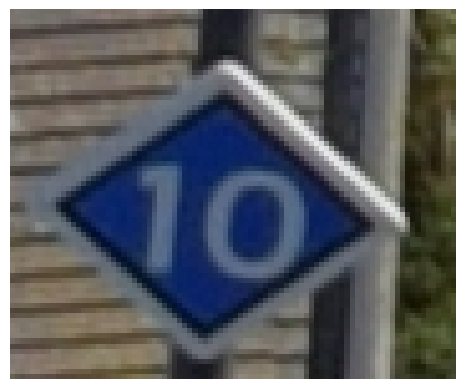

Label: stop_indicator 10
Geolocation:  [189022.25969652395, 506331.2392134701]


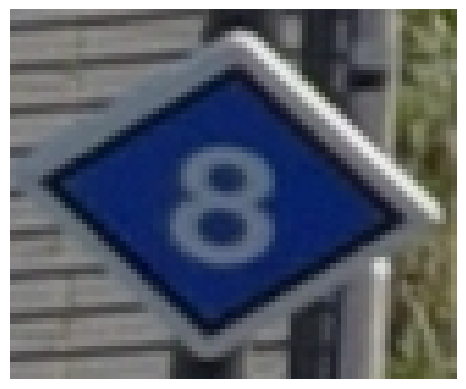

Label: stop_indicator 8
Geolocation:  [189020.93759121388, 506336.5518673468]


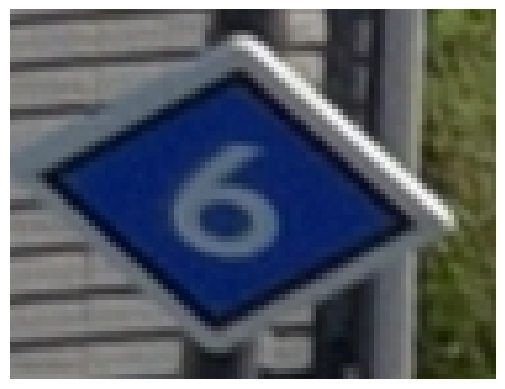

Label: stop_indicator 6
Geolocation:  [189023.53623158313, 506340.0638531295]
 ___  __  __     _      ____  _____   ____  
|_ _||  \/  |   / \    / ___|| ____| |___ \ 
 | | | |\/| |  / _ \  | |  _ |  _|     __) |
 | | | |  | | / ___ \ | |_| || |___   / __/ 
|___||_|  |_|/_/   \_\ \____||_____| |_____|
                                            



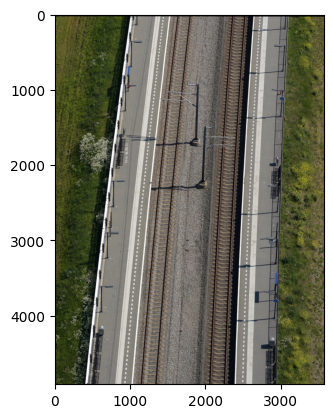

 ____   _                      ____  
/ ___| (_)  __ _  _ __   ___  |___ \ 
\___ \ | | / _` || '_ \ / __|   __) |
 ___) || || (_| || | | |\__ \  / __/ 
|____/ |_| \__, ||_| |_||___/ |_____|
           |___/                     



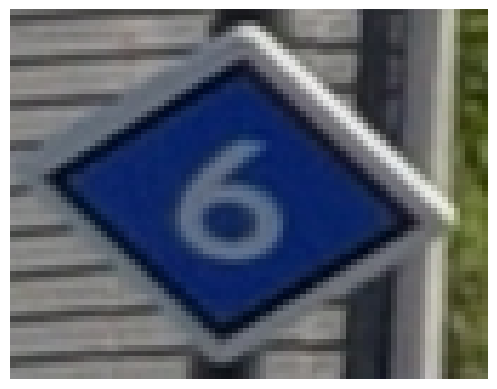

Label: stop_indicator 6
Geolocation:  [189023.53623158313, 506340.0638531295]


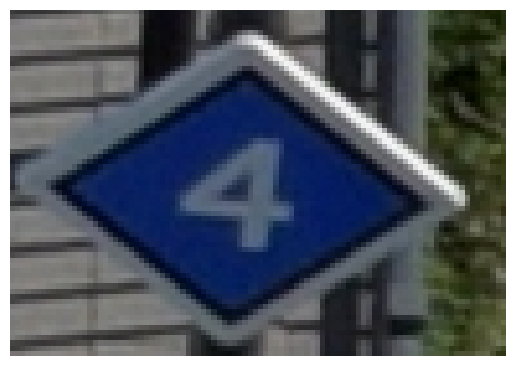

Label: stop_indicator 4
Geolocation:  No sufficient data for geolocation


In [68]:
# Input 2 consecutive images for triangualtion as well

test_set1 = [images + 'new_cropped_41269_B004_00850.tif', images + 'new_cropped_41269_B004_00851.tif']

test_set2 = [images + 'new_cropped_41269_B004_00905.tif', images + 'new_cropped_41269_B004_00906.tif']

test_sets = [test_set1, test_set2]


for test_set in test_sets:
  main2(test_set[0], test_set[1], 0.4)


# Traffic lights
test1 = images + "new_cropped_41269_B004_00850.tif"

# Underperforming with km_sign -> random image
test2 = images + "new_cropped_41269_B004_00873.tif"

# One danger sign
test3 = images + "new_cropped_41269_B004_00885.tif"

# One km sign
test4 = images + "new_cropped_41269_B004_00865.tif"

# Emerygency sign example
test6 = images + "new_cropped_41269_B004_00933.tif"


# Stop indicator and OCR example
test7 = images + "new_cropped_41269_B004_00905.tif"


tests = [test1, test2, test3, test4, test6, test7]

# Input one image just for sign classificatoin and detection
#for test in tests:
#  main1(test, 0.4)